In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def dda_ray(origin, direction, grid_bounds, max_steps=1000):
    """
    Perform 2D DDA ray traversal starting from origin with given direction.
    Returns the list of (ix, iy) cells that the ray passes through.

    Parameters
    ----------
    origin : (float, float)
        Starting point (x, y)
    direction : (float, float)
        Direction vector (dx, dy)
    grid_bounds : (xmin, xmax, ymin, ymax)
        Bounds of the grid in world coordinates (integer cell indices)
    max_steps : int
        Safety limit on number of cells to traverse
    """
    x0, y0 = origin
    dx, dy = direction
    xmin, xmax, ymin, ymax = grid_bounds

    # normalize direction
    mag = np.hypot(dx, dy)
    dx /= mag
    dy /= mag

    # current cell (integer)
    ix = int(np.floor(x0))
    iy = int(np.floor(y0))

    # step direction for x/y
    step_x = 1 if dx > 0 else -1
    step_y = 1 if dy > 0 else -1

    # distance to next boundary along each axis
    next_x = (ix + (step_x > 0)) - x0
    next_y = (iy + (step_y > 0)) - y0
    t_max_x = next_x / dx if dx != 0 else np.inf
    t_max_y = next_y / dy if dy != 0 else np.inf

    # distance between boundaries
    t_delta_x = abs(1 / dx) if dx != 0 else np.inf
    t_delta_y = abs(1 / dy) if dy != 0 else np.inf

    cells = []
    for _ in range(max_steps):
        if ix < xmin or ix >= xmax or iy < ymin or iy >= ymax:
            break  # left the grid
        cells.append((ix, iy))
        # advance to next cell boundary
        if t_max_x < t_max_y:
            ix += step_x
            t_max_x += t_delta_x
        else:
            iy += step_y
            t_max_y += t_delta_y

    return cells


In [18]:
# grid bounds
xmin, xmax, ymin, ymax = 0, 21, 0, 21

# ray start & direction
origin = (0, 1)
direction = (1.0, 0.4)

cells = dda_ray(origin, direction, (xmin, xmax, ymin, ymax))
print("Traversed cells:", cells)


Traversed cells: [(0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (8, 4), (9, 4), (9, 5), (10, 5), (11, 5), (12, 5), (12, 6), (13, 6), (14, 6), (14, 7), (15, 7), (16, 7), (17, 7), (17, 8), (18, 8), (19, 8), (19, 9), (20, 9)]


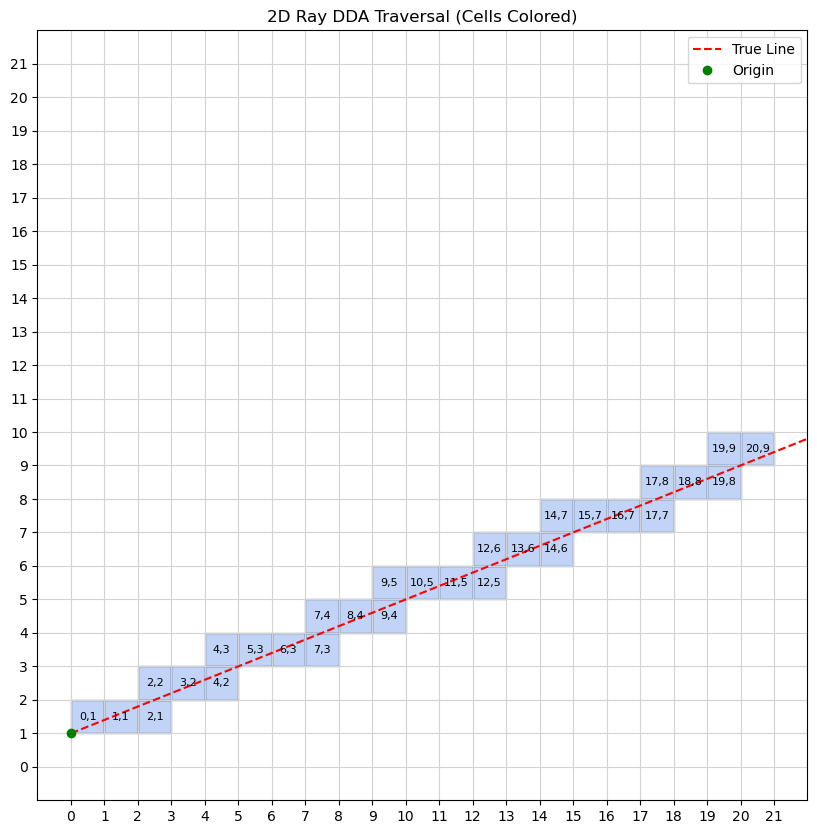

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

# draw grid
for x in range(xmin, xmax + 1):
    ax.axvline(x, color='lightgray', lw=0.8)
for y in range(ymin, ymax + 1):
    ax.axhline(y, color='lightgray', lw=0.8)

# draw traversed cells
for (ix, iy) in cells:
    rect = patches.Rectangle((ix, iy), 1, 1, facecolor='cornflowerblue', alpha=0.4, edgecolor='k')
    ax.add_patch(rect)
    ax.text(ix+0.5, iy+0.5, f'{ix},{iy}', ha='center', va='center', fontsize=8)

# draw true line
line_len = 40  # long enough to cross grid
x_line = [origin[0], origin[0] + direction[0] * line_len]
y_line = [origin[1], origin[1] + direction[1] * line_len]
ax.plot(x_line, y_line, 'r--', lw=1.5, label='True Line')

# mark starting point
ax.plot(origin[0], origin[1], 'go', label='Origin')

# setup axis
ax.set_xlim(xmin-1, xmax+1)
ax.set_ylim(ymin-1, ymax+1)
ax.set_aspect('equal')
ax.set_xticks(range(xmin, xmax+1))
ax.set_yticks(range(ymin, ymax+1))
ax.grid(False)
ax.legend()
ax.set_title("2D Ray DDA Traversal (Cells Colored)")
plt.show()
